## Social Network Analysis

In this notebook, I will perform initial social network analysis

### Import libraries

#### Basic libraries

In [45]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import math
from collections import Counter
import gzip
import re
import warnings
import random
warnings.simplefilter("ignore")

#### Network analysis and Network data visualization

In [2]:
import networkx as nx
import itertools
import os
from pyvis.network import Network

#### Profane language detection library

In [3]:
import sklearn.externals as extjoblib
import joblib
from profanity_check import predict, predict_prob

### Load data

In [26]:
freq_user_df = pd.read_csv('../data/chat_sna_shaped.csv')
freq_user_df

source       target  weight  match      type
0                Monkey         Kira       1      0  Directed
1                feeder          ._.       1     71  Directed
2              Miracle-        4Head       1     86  Directed
3                Fluffy        Horse       1    121  Directed
4                  Arbi        Chill       1    144  Directed
...                 ...          ...     ...    ...       ...
1672        OnePunchMan   Nek-Ro-Sin       1  24446  Directed
1673               Carl     Achilles       1  24451  Directed
1674               Carl  Snipe Desu~       1  24451  Directed
1675                 JJ         Skye       9  24455  Directed
1676  [THG]Executer26th         XIII       1  24479  Directed

[1677 rows x 5 columns]

## Build Social Network

### Initiate network

In [27]:
directed_G = nx.DiGraph()

#### Add source and target data to initiated networks

In [28]:
directed_G = nx.from_pandas_edgelist(freq_user_df, source = 'source', target = 'target')

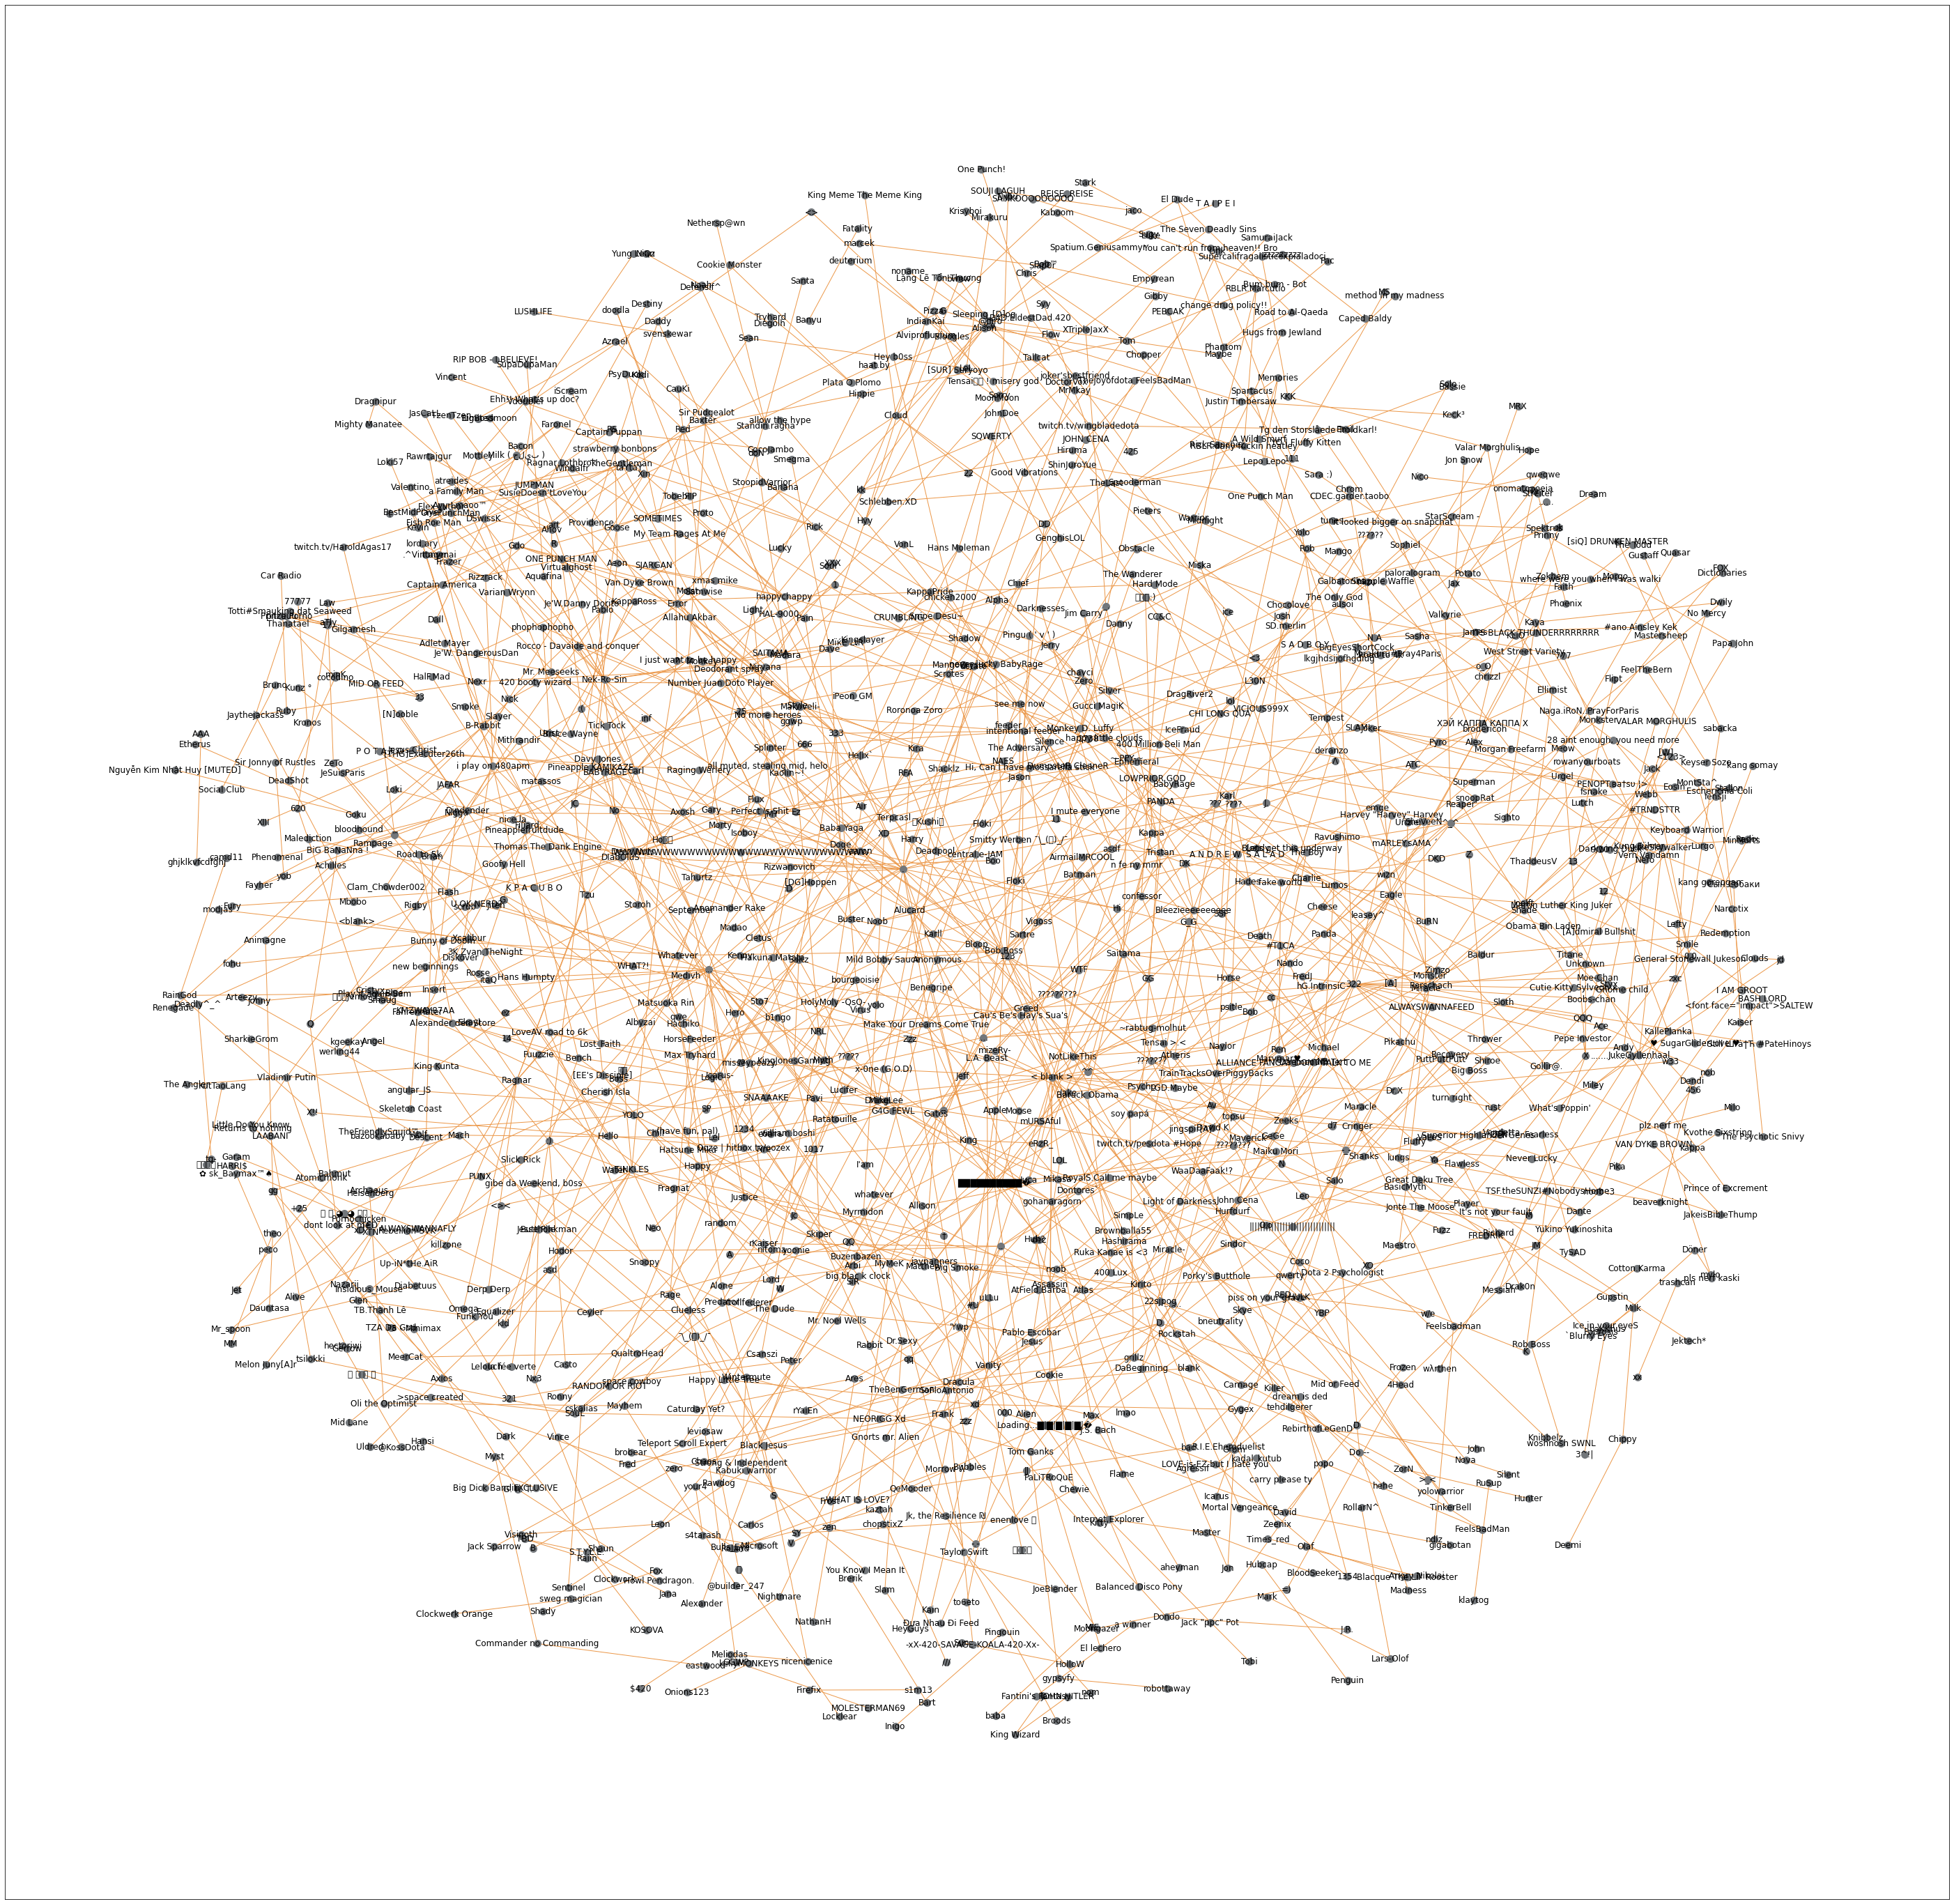

In [29]:
plt.figure(figsize=(50, 50))
pos = nx.spring_layout(directed_G, k=5/math.sqrt(directed_G.order()))
nx.draw_networkx(directed_G, pos, node_size = 100, node_color = '#73777B', edge_color = '#EC994B')
plt.show()

## Detect important users from the user network

### Degree Centrality
Number of connected nodes (players) based on the number of links held by each node (players). It tells us how many direct connections exist in the network

In [15]:
d_centrality = nx.degree_centrality(directed_G)

In [16]:
nx.info(directed_G)

'Graph with 1262 nodes and 1416 edges'

#### Ids with high degree centrality

In [17]:
sorted(d_centrality.items(), key = lambda x:x[1], reverse = True)[0:20]

[('< blank >', 0.022204599524187154),
 ('.', 0.019032513877874704),
 ('...', 0.01506740681998414),
 ('322', 0.013481363996827915),
 ('Bob Ross', 0.010309278350515464),
 ('Saitama', 0.008723235527359239),
 ('Ragnar', 0.008723235527359239),
 ('Carl', 0.008723235527359239),
 ('TINKLES', 0.007930214115781126),
 ('^_^', 0.007930214115781126),
 ('123', 0.007137192704203013),
 ('Kirito', 0.007137192704203013),
 ('....', 0.007137192704203013),
 ('Nek-Ro-Sin', 0.007137192704203013),
 (':)', 0.006344171292624901),
 ('CHI LONG QUA', 0.006344171292624901),
 ('gohanaragorn', 0.006344171292624901),
 ('Eagle', 0.006344171292624901),
 ('????????', 0.0055511498810467885),
 ('..', 0.0055511498810467885)]

In [18]:
cent_val = list(d_centrality.values())

#### Mean of degree centrality

In [ ]:
sum(cent_val) / len(cent_val)

0.001779585291275125

### Betweenness Centrality
Measures the number of times a node lies on the shortest paths of networks created by nodes. It shows which node (players) is/are important hubs in a network.

In [55]:
b_centrality = nx.betweenness_centrality(directed_G, k = 10)

In [56]:
sorted(b_centrality.items(), key = lambda x:x[1], reverse = True)[0:20]

[('< blank >', 0.14920305774276213),
 ('...', 0.12105557310837568),
 ('asdf', 0.10642282730176271),
 ('Bob Ross', 0.10085802646413418),
 ('.', 0.08988400075490376),
 ('David K', 0.08910805478926573),
 ('Eagle', 0.08827692911099881),
 ('3K.Zvan.TheNight', 0.0826677179254499),
 ('ZeTo', 0.08117543395893911),
 ('Van Dyke Brown', 0.08066104298799437),
 ('Law', 0.08064591384179014),
 ('TheLast', 0.07995753768949644),
 ('Captain America', 0.07903087748448574),
 ('Recovery', 0.07870938312764528),
 ("Cau's Be's Hay's Sua's", 0.07793744473654377),
 ('GG', 0.07577767551454345),
 ('123', 0.06772713589797538),
 ('Dracula', 0.06411697675810124),
 ('Kirito', 0.06398932264218252),
 ('Tristan', 0.05955758606200432)]

In [57]:
b_cent_val = list(b_centrality.values())

#### Mean of betweenness centrality

In [58]:
sum(b_cent_val) / len(b_cent_val)

0.0039073297836184455

## Create dataframes for further analysis via Gephi

This part is for further analysis using the program called 'Gephi.' Gephi is specifically designed for network analysis. It includes several features with basic statistics and visualization, along with interactive format. The dataframe created below will be imported to Gephi. The results of Gephi will be imported as .json file and then deployed to .netlify server for html visualizaion.

### Remove ids with high centrality

In [59]:
high_central_user = sorted(d_centrality.items(), key = lambda x:x[1], reverse = True)[0:10]
high_central_user

[('< blank >', 0.022204599524187154),
 ('.', 0.019032513877874704),
 ('...', 0.01506740681998414),
 ('322', 0.013481363996827915),
 ('Bob Ross', 0.010309278350515464),
 ('Saitama', 0.008723235527359239),
 ('Ragnar', 0.008723235527359239),
 ('Carl', 0.008723235527359239),
 ('TINKLES', 0.007930214115781126),
 ('^_^', 0.007930214115781126)]

In [60]:
maluser_high_central = [res[0] for res in high_central_user]
maluser_high_central

['< blank >',
 '.',
 '...',
 '322',
 'Bob Ross',
 'Saitama',
 'Ragnar',
 'Carl',
 'TINKLES',
 '^_^']

In [61]:
freq_user_wo_high_central = freq_user_df[~freq_user_df['source'].isin(maluser_high_central) & ~freq_user_df['target'].isin(maluser_high_central)]
freq_user_wo_high_central

source            target  weight  match      type
0                Monkey              Kira       1      0  Directed
1                feeder               ._.       1     71  Directed
2              Miracle-             4Head       1     86  Directed
3                Fluffy             Horse       1    121  Directed
4                  Arbi             Chill       1    144  Directed
...                 ...               ...     ...    ...       ...
1670              Rigby    Vladimir Putin       1  24414  Directed
1671              Rigby  i play on 480apm       1  24414  Directed
1672        OnePunchMan        Nek-Ro-Sin       1  24446  Directed
1675                 JJ              Skye       9  24455  Directed
1676  [THG]Executer26th              XIII       1  24479  Directed

[1515 rows x 5 columns]

In [62]:
freq_user_wo_high_central.to_csv('../data/wo_high_centrality.csv', index = False)

### 10 ids with high betweenness centrality

In [23]:
high_between_central_user = sorted(b_centrality.items(), key = lambda x:x[1], reverse = True)[0:10]
high_between_central_user

[('< blank >', 0.12150084936609236),
 ('.', 0.10210167356780023),
 ('Hades', 0.088525173184967),
 ('322', 0.082883798236891),
 ('The Boy', 0.08189690511855462),
 ('Gary', 0.07976161524615133),
 ('Thrower', 0.07929563754306021),
 ('Varian Wrynn', 0.0781571692911899),
 ('...', 0.06364092168330111),
 ('Death', 0.05448610714000995)]

In [24]:
maluser_high_between_central = [res[0] for res in high_between_central_user]
maluser_high_between_central

['< blank >',
 '.',
 'Hades',
 '322',
 'The Boy',
 'Gary',
 'Thrower',
 'Varian Wrynn',
 '...',
 'Death']

In [30]:
freq_user_wo_between_central = freq_user_df[~freq_user_df['source'].isin(maluser_high_between_central) & ~freq_user_df['target'].isin(maluser_high_between_central)]
freq_user_wo_between_central

source       target  weight  match      type
0                Monkey         Kira       1      0  Directed
1                feeder          ._.       1     71  Directed
2              Miracle-        4Head       1     86  Directed
3                Fluffy        Horse       1    121  Directed
4                  Arbi        Chill       1    144  Directed
...                 ...          ...     ...    ...       ...
1672        OnePunchMan   Nek-Ro-Sin       1  24446  Directed
1673               Carl     Achilles       1  24451  Directed
1674               Carl  Snipe Desu~       1  24451  Directed
1675                 JJ         Skye       9  24455  Directed
1676  [THG]Executer26th         XIII       1  24479  Directed

[1565 rows x 5 columns]

In [31]:
freq_user_wo_between_central.to_csv('0510_wo_high_between.csv', index = False)

### Maluser = Union of high betweenness centrality and high degree centrality

In [32]:
maluser = high_between_central_user and maluser_high_between_central
maluser

['< blank >',
 '.',
 'Hades',
 '322',
 'The Boy',
 'Gary',
 'Thrower',
 'Varian Wrynn',
 '...',
 'Death']

In [33]:
freq_user_wo_maluser = freq_user_df[~freq_user_df['source'].isin(maluser) & ~freq_user_df['target'].isin(maluser)]
freq_user_wo_maluser

source       target  weight  match      type
0                Monkey         Kira       1      0  Directed
1                feeder          ._.       1     71  Directed
2              Miracle-        4Head       1     86  Directed
3                Fluffy        Horse       1    121  Directed
4                  Arbi        Chill       1    144  Directed
...                 ...          ...     ...    ...       ...
1672        OnePunchMan   Nek-Ro-Sin       1  24446  Directed
1673               Carl     Achilles       1  24451  Directed
1674               Carl  Snipe Desu~       1  24451  Directed
1675                 JJ         Skye       9  24455  Directed
1676  [THG]Executer26th         XIII       1  24479  Directed

[1565 rows x 5 columns]

In [34]:
freq_user_wo_maluser.loc[freq_user_wo_maluser['source'] == '.']

Empty DataFrame
Columns: [source, target, weight, match, type]
Index: []

In [63]:
freq_user_wo_maluser.to_csv('../data/wo_maluser.csv', index = False)

### Remove 10 random player from the dataframe

In [40]:
target_list = freq_user_df['target'].unique().tolist()
source_list = freq_user_df['source'].unique().tolist()

In [46]:
overlap_players = target_list and source_list

In [47]:
random_players = random.choices(overlap_players, k = 10)
random_players

['Providence',
 'Sun',
 'Zero',
 '[DG]Hoppen',
 'West Street Variety',
 'TheBenGerman',
 'LoveAV road to 6k',
 'David K',
 'Miska',
 'Gary']

In [48]:
freq_user_wo_randuser = freq_user_df[~freq_user_df['source'].isin(random_players) & ~freq_user_df['target'].isin(random_players)]
freq_user_wo_randuser

source       target  weight  match      type
0                Monkey         Kira       1      0  Directed
1                feeder          ._.       1     71  Directed
2              Miracle-        4Head       1     86  Directed
3                Fluffy        Horse       1    121  Directed
4                  Arbi        Chill       1    144  Directed
...                 ...          ...     ...    ...       ...
1672        OnePunchMan   Nek-Ro-Sin       1  24446  Directed
1673               Carl     Achilles       1  24451  Directed
1674               Carl  Snipe Desu~       1  24451  Directed
1675                 JJ         Skye       9  24455  Directed
1676  [THG]Executer26th         XIII       1  24479  Directed

[1641 rows x 5 columns]

In [49]:
freq_user_wo_randuser.loc[freq_user_wo_randuser['source'] == 'Urist']

source                           target  weight  match      type
654   Urist                     phophophopho       1   9222  Directed
1473  Urist  WWWWWWWWWWWWWWWWWWWWWWWWWWWWWWW       1  21450  Directed

In [64]:
freq_user_wo_randuser.to_csv('../data/wo_randuser.csv', index = False)

In [51]:
random_players1 = random.choices(overlap_players, k = 10)
random_players1

['Superior Highlander Genes',
 'psitle',
 'Banana',
 'A',
 'Kappa',
 'Rorschach',
 '?????',
 'Noah',
 'Caped Baldy',
 '<blank>']

In [52]:
freq_user_wo_randuser1 = freq_user_df[~freq_user_df['source'].isin(random_players1) & ~freq_user_df['target'].isin(random_players1)]
freq_user_wo_randuser1

source       target  weight  match      type
0                Monkey         Kira       1      0  Directed
1                feeder          ._.       1     71  Directed
2              Miracle-        4Head       1     86  Directed
3                Fluffy        Horse       1    121  Directed
4                  Arbi        Chill       1    144  Directed
...                 ...          ...     ...    ...       ...
1672        OnePunchMan   Nek-Ro-Sin       1  24446  Directed
1673               Carl     Achilles       1  24451  Directed
1674               Carl  Snipe Desu~       1  24451  Directed
1675                 JJ         Skye       9  24455  Directed
1676  [THG]Executer26th         XIII       1  24479  Directed

[1649 rows x 5 columns]

In [65]:
freq_user_wo_randuser.to_csv('../data/wo_randuser1.csv', index = False)